## Windows+Shift+S ---> taking the screenshots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Creating a new column family in the dataset by adding SibSp column and Parch column
df['Family'] = df['SibSp']+df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [4]:
# Ticket --> As it is just a random number,we can skip this column from our analysis

In [5]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [6]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [7]:
# Based on the categories, we will analyze which category people were more likely to survive
## Low,Mid,Mid-High,High
df['Fare_Category']=pd.cut(df.Fare,bins = [0,7.9,14.45,31.00,512],labels = ['Low','Mid','Mid-High','High'] )
df['Fare_Category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [8]:
# Comparing the fare with fare category
df[['Fare','Fare_Category']]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid-High
888,23.4500,Mid-High
889,30.0000,Mid-High


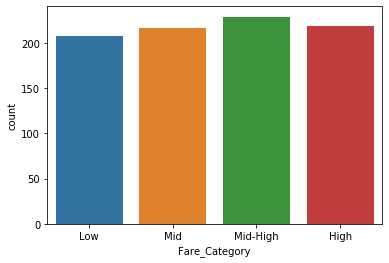

In [9]:
## Visualize the Fare Category
## Countplot give you entire count of a category--> categories of Survived and Deceased
sns.countplot(x = 'Fare_Category',data=df)

Text(0.5, 1.0, 'Survival based on Fare Category')

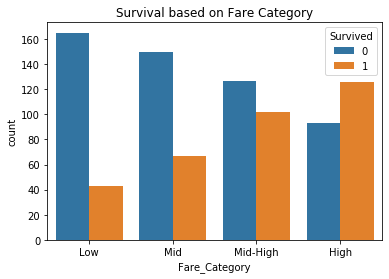

In [10]:
sns.countplot(x = 'Fare_Category',hue='Survived',data=df).\
set_title('Survival based on Fare Category')

In [11]:
## Embarked: Port--> from which the passenger had boarded the ship
df.Embarked.value_counts()# Out of 100% passengers which part has taken more %

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

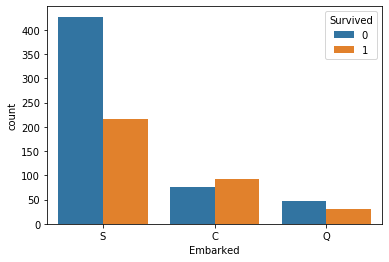

In [13]:
## Visualizing the Port column
sns.countplot(x='Embarked',hue='Survived',data=df)

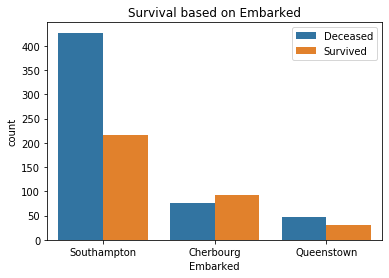

In [14]:
## Visualizing the Port column, S-
p=sns.countplot(x = 'Embarked',hue='Survived',data=df)
p.set_xticklabels(['Southampton','Cherbourg','Queenstown'])
p.set_title('Survival based on Embarked')
p.legend(labels=['Deceased','Survived'])

In [15]:
## Imputing with missing values
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [16]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [17]:
## Cabin--> 77% missing values,we are going to create a new category as NA
df.Cabin.fillna('NA',inplace=True)

In [18]:
df.Cabin.isnull().sum()

0

In [19]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [20]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
# Median ---> sorting in the order (middle value) NaN in the age column should be substituted with median of age
df.Age.fillna(df.Age.median(),inplace=True)
df.Age.isnull().sum()

0

In [22]:
## Imputing the Embarked Column---> Mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)
df.Embarked.isnull().sum()

0

In [23]:
# Imputing the Fare Category column
df.Fare_Category.isnull().sum()

18

In [24]:
df.Fare_Category.fillna(df.Fare_Category.mode()[0],inplace=True)
df.Fare_Category.isnull().sum()

0

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

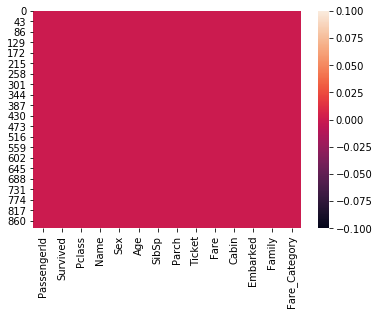

In [26]:
sns.heatmap(df.isnull())

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [28]:
df['Age-Range']=pd.cut(df.Age,[0,10,20,30,40,60,80])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


In [30]:
#when we are creating dummy columns ,we need to dropone dummy column---> it leads to a situation called as Dummy Variable Trap
dummy_set = pd.get_dummies(df.Fare_Category,drop_first=True) # n columns,we need to include upto n-1 dummy columns

In [31]:
df = pd.concat([df,dummy_set],axis=1)

In [32]:
# Encoding of Categorical Variables/Columns
df = pd.concat([df,pd.get_dummies(df.Cabin,prefix='Cabin',drop_first=True),
               pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
               pd.get_dummies(df.Fare_Category,prefix='Fare',drop_first=True),
               pd.get_dummies(df['Age-Range'],drop_first=True)],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [33]:
#LabelEncoder---> 0,1,2,3,4....(How many categories are present in the columns,that many numbers you get)
#LabelEncoder is mostly used for 2 columns not for more than 2
#OneHotEncoder---> it will create dummy columns for each and every category
#Encoding the Sex Column with LabelEncoder
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [34]:
#Drop the unnecessary columns
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_Category','Age-Range','Cabin'],
        axis=1,inplace=True)
df.shape

(891, 164)

In [35]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [36]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Family      int64
Mid         uint8
            ...  
(10, 20]    uint8
(20, 30]    uint8
(30, 40]    uint8
(40, 60]    uint8
(60, 80]    uint8
Length: 164, dtype: object

In [37]:
## StandardScaler-- not required for this (DistanceBased Algorithms)

In [38]:
## Seperating the Input and Output Data,dropping the Survuved column from the data
X = df.drop('Survived',axis=1)
X.shape

(891, 163)

In [39]:
y=df.iloc[:,0]
y.shape

(891,)

In [40]:
## Input and Output into training data and testing data
## Training--> we will be training the model on the training data
## Testing --> check the performance of the model
## 891--> out of 891, 75% of 891 rows will be in training dataset and 25% of rows will
                ##be in testing data

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=1)#random_state = to select the constant rows 

In [42]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(668, 163)
(223, 163)
(668,)
(223,)


In [43]:
X_train

,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
35,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
46,3,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
453,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
291,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
748,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
767,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
72,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
235,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [44]:
Y_train#Output of X_train

35     0
46     0
453    1
291    1
748    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 668, dtype: int64

In [45]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [46]:
X_test

,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
862,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
223,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
84,2,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
680,3,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
535,2,0,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2,0,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
467,1,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
740,1,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
354,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
Y_test

862    1
223    0
84     1
680    0
535    1
      ..
506    1
467    0
740    1
354    0
449    1
Name: Survived, Length: 223, dtype: int64

In [48]:
## To display all the columns in the data frame,
##we have to use set_option display.max_columns to be set  to
##None(None means unlimitted)
pd.set_option('display.max_columns',None)#50,it will display on the 50 columns

In [49]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,Cabin_B96 B98,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C125,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C2,Cabin_C22 C26,Cabin_C23 C25 C27,Cabin_C30,Cabin_C32,Cabin_C45,Cabin_C46,Cabin_C47,Cabin_C49,Cabin_C50,Cabin_C52,Cabin_C54,Cabin_C62 C64,Cabin_C65,Cabin_C68,Cabin_C7,Cabin_C70,Cabin_C78,Cabin_C82,Cabin_C83,Cabin_C85,Cabin_C86,Cabin_C87,Cabin_C90,Cabin_C91,Cabin_C92,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0

In [51]:
pd.get_option('display.max_rows')

60

In [52]:
#Reset to the previous mode
pd.reset_option('display.max_columns')

In [53]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-High,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


From Classification: we are classifying whether the passenger is survived or not
    Logistic Regression:

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression

In [56]:
## We have to apply this object(log_reg) to the training data
log_reg.fit(X_train,Y_train )# with help of fit method we are fitting the 
            ## Logistic Regression on training data
## objectName.fit(InputData,OutputData)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Instead of directly predicting on test data,let us see how well the model predicts the training data


In [58]:
## Predicting on the training data 
##Syntax:objectName.predict(Input)
y_train_pred = log_reg.predict(X_train)

y_train --> original output
y_train_pred --> model predicted output

In [60]:
Y_train == y_train_pred# Comparing original data output and model predicted output

35      True
46      True
453     True
291     True
748     True
       ...  
715     True
767    False
72      True
235     True
37      True
Name: Survived, Length: 668, dtype: bool

In [62]:
## accuracy_score---> With help of this metric, we can evaluate the overall
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(Y_train,y_train_pred)

0.8488023952095808

In [64]:
## Predict the model on Test:
y_test_pred = log_reg.predict(X_test)
y_test_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [65]:
Y_test==y_test_pred

862     True
223     True
84      True
680    False
535     True
       ...  
506     True
467     True
740    False
354     True
449    False
Name: Survived, Length: 223, dtype: bool

In [66]:
## accuracy  of the test data(Original test data output and the model predicted 
##output)
accuracy_score(Y_test,y_test_pred)

0.7713004484304933

In [ ]:
## For the training data -- we got an accuracy of 84%
## For testing data-- we got an accuracy of 77% 

In [ ]:
## Performance Metrics--> To evaluate the model is predicting